## Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as LE
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Загружаем набор данных в DataFrame

In [2]:
iris_df = pd.read_csv('iris.data')
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


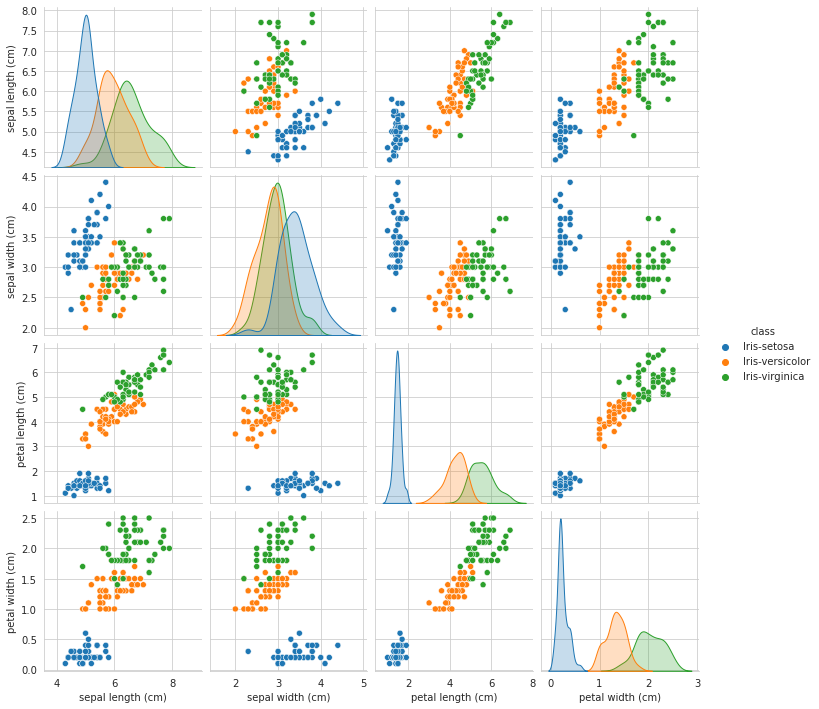

In [3]:
sns.pairplot(iris_df, hue='class')

# Считаем корреляцию признаков на всем наборе данных и отдельно по классам

In [4]:
iris_df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


In [5]:
iris_df[iris_df['class'] == 'Iris-setosa'].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.746780,0.263874,0.279092
sepal width (cm),0.746780,1.000000,0.176695,0.279973
petal length (cm),0.263874,0.176695,1.000000,0.306308
petal width (cm),0.279092,0.279973,0.306308,1.000000


In [6]:
iris_df[iris_df['class'] == 'Iris-virginica'].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


In [7]:
iris_df[iris_df['class'] == 'Iris-versicolor'].corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


In [8]:
# Оставляем 2 признака
df = iris_df.loc[:, ['sepal width (cm)', 'petal length (cm)', 'class']]

In [9]:
X = df.loc[:, ['sepal width (cm)', 'petal length (cm)']][:].values
y = df.loc[:, ['class']][:].values

# Используем LabelEncoder, чтобы закодировать классы числами
le = LE()
y = le.fit_transform(y)

# Устанавливаем сетку для графиков
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 1000),
    np.linspace(X[:, 1].min() - 1 / 2, X[:, 1].max() + 1 / 2, 1000)
)



In [10]:
# xx

# Linear Discriminant Analysis

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_clf = LDA().fit(X, y)

In [12]:
Z = lda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape

(1000000,)

In [13]:
Z = Z.reshape(xx.shape)
Z.shape
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


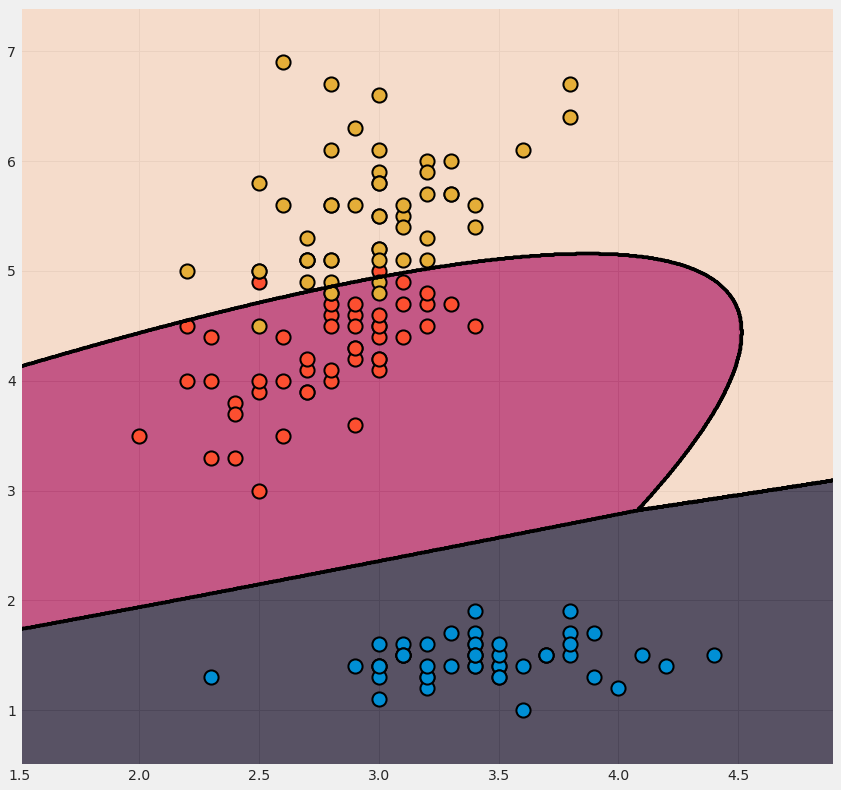

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 13))
plt.contourf(xx, yy, Z, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z, linewidths=3,colors='black')

plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, linewidths=2.,edgecolors='black')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200,linewidths=2.,edgecolors='black')
plt.scatter(X[100:][:, 0], X[100:][:, 1], s=200,linewidths=2.,edgecolors='black')

# Quadratic Discriminant Analysis

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda_clf = QDA().fit(X, y)

In [31]:
Z = qda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

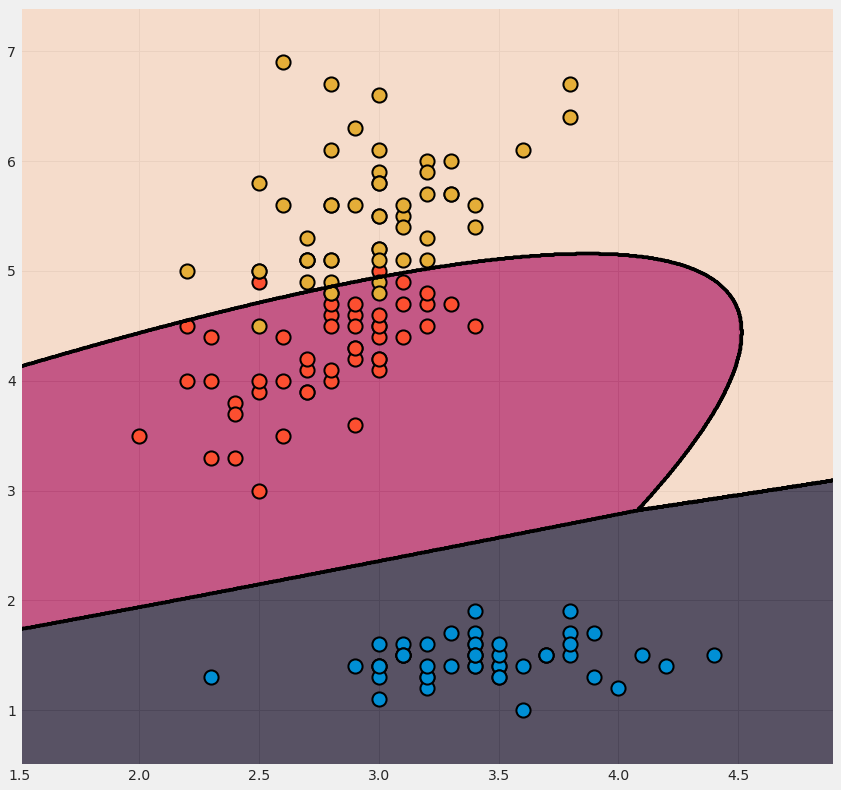

In [37]:
plt.figure(figsize=(13, 13))
plt.contourf(xx, yy, Z, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z, linewidths=3,colors='black')

plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, linewidths=2.,edgecolors='black')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200,linewidths=2.,edgecolors='black')
plt.scatter(X[100:][:, 0], X[100:][:, 1], s=200,linewidths=2.,edgecolors='black')

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression as LR

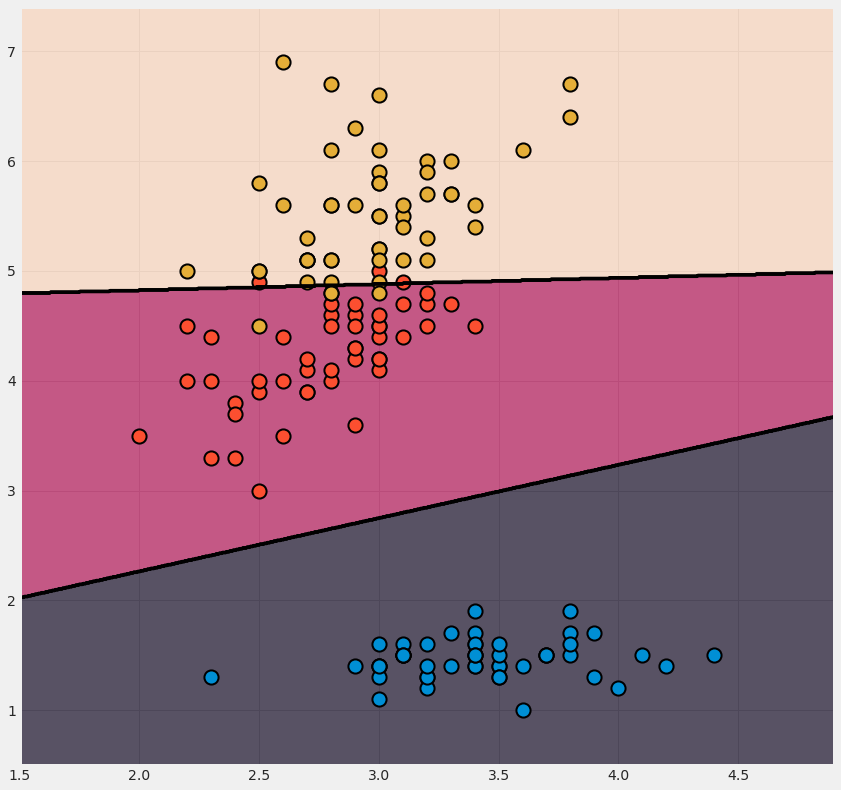

In [41]:
LR_clf = LR().fit(X, y)

Z = LR_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(13, 13))
plt.contourf(xx, yy, Z, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z, linewidths=3,colors='black')

plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, linewidths=2.,edgecolors='black')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200,linewidths=2.,edgecolors='black')
plt.scatter(X[100:][:, 0], X[100:][:, 1], s=200,linewidths=2.,edgecolors='black')

In [42]:
from sklearn.svm import SVC

In [43]:
svm_lin_clf = SVC(kernel='linear').fit(X, y)  # обучаем классификатор

In [44]:
Z = svm_lin_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

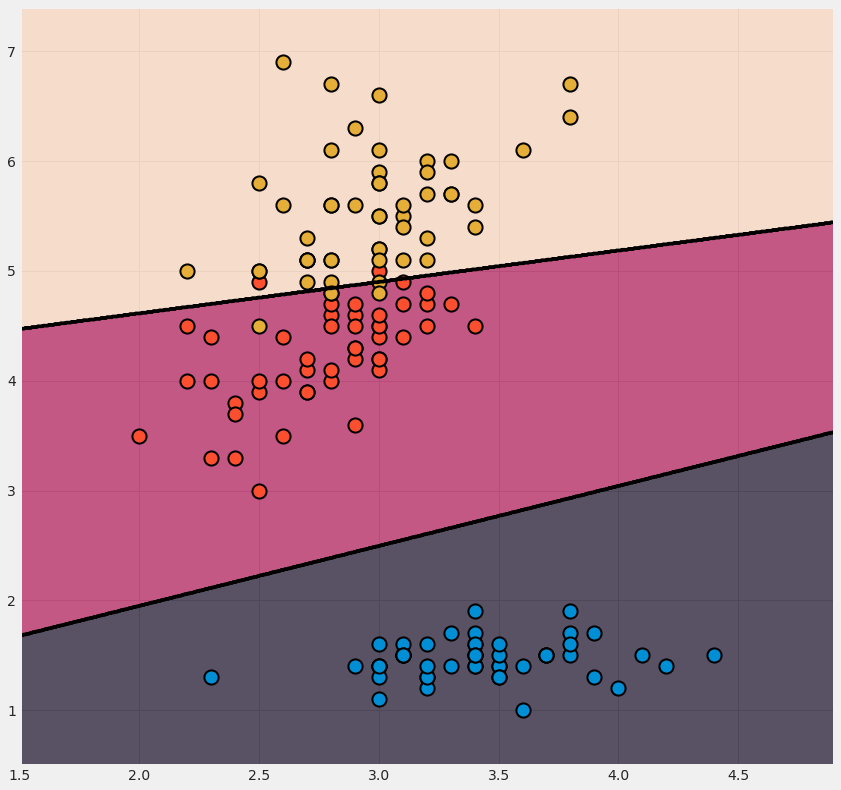

In [45]:
plt.figure(figsize=(13, 13))
plt.contourf(xx, yy, Z, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z, linewidths=3,colors='black')

plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, linewidths=2.,edgecolors='black')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200,linewidths=2.,edgecolors='black')
plt.scatter(X[100:][:, 0], X[100:][:, 1], s=200,linewidths=2.,edgecolors='black')

In [46]:
svm_poly_clf = SVC(kernel='poly', degree=2).fit(X, y)

In [47]:
Z = svm_poly_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

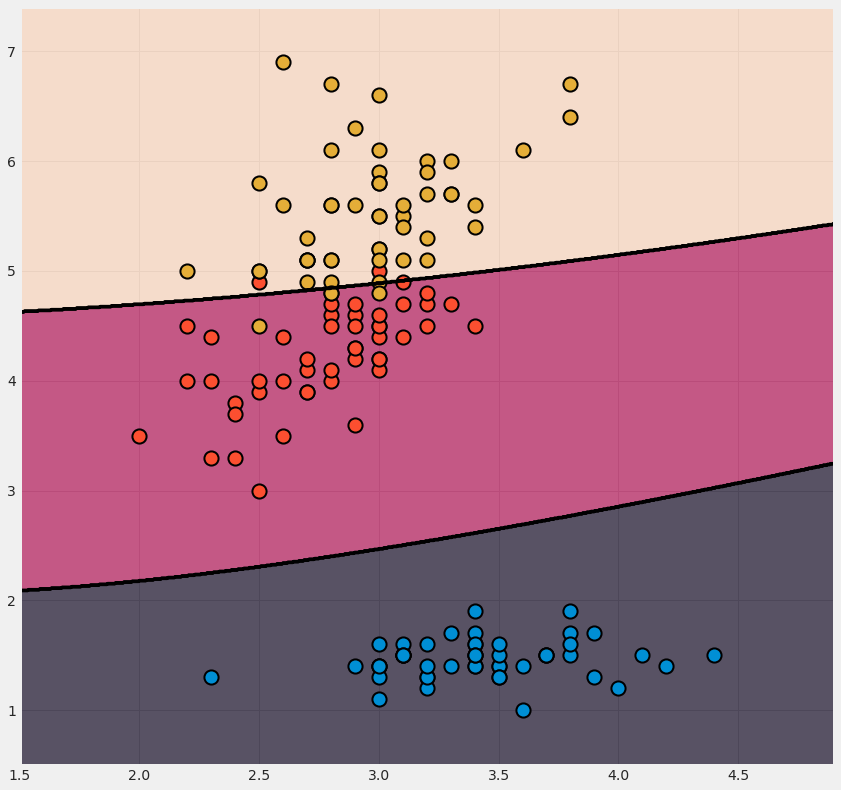

In [48]:
plt.figure(figsize=(13, 13))
plt.contourf(xx, yy, Z, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z, linewidths=3,colors='black')

plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, linewidths=2.,edgecolors='black')
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200,linewidths=2.,edgecolors='black')
plt.scatter(X[100:][:, 0], X[100:][:, 1], s=200,linewidths=2.,edgecolors='black')

# Task 3

In [49]:
X = iris_df.drop(['class'], axis=1)[50:]
feat_names = X.columns
y = iris_df.loc[:, ['class']][50:]

le = LE()
y = le.fit_transform(y)

model = LDA()
model.fit(X, y)

X_0 = X[y == np.zeros(y.shape)]  # данные относящиеся к 0 классу
y_0 = y[y == np.zeros(y.shape)]

X_1 = X[y != np.zeros(y.shape)]  # данные относящиеся к 1 классу
y_1 = y[y != np.zeros(y.shape)]

X_0_T = X_0[y_0 == model.predict(X_0)].values  # верно классифицированые данные 0-го класса
X_0_F = X_0[y_0 != model.predict(X_0)].values  # неверно классифицированые данные 0-го класса
X_1_T = X_1[y_1 == model.predict(X_1)].values  # верно классифицированые данные 1-го класса
X_1_F = X_1[y_1 != model.predict(X_1)].values  # неверно классифицированые данные 1-го класса


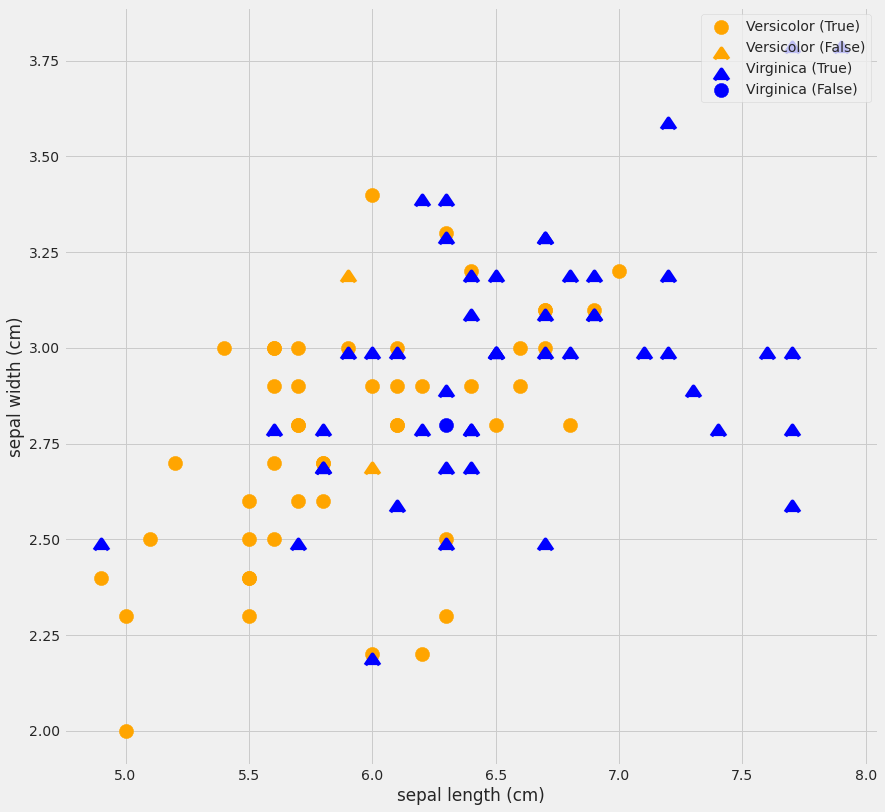

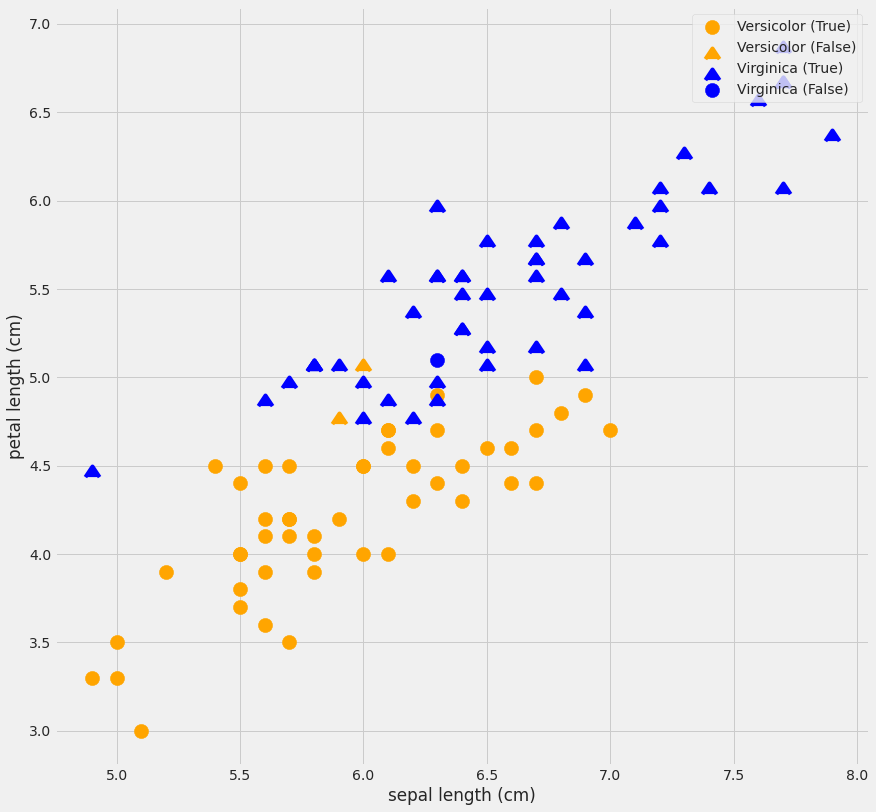

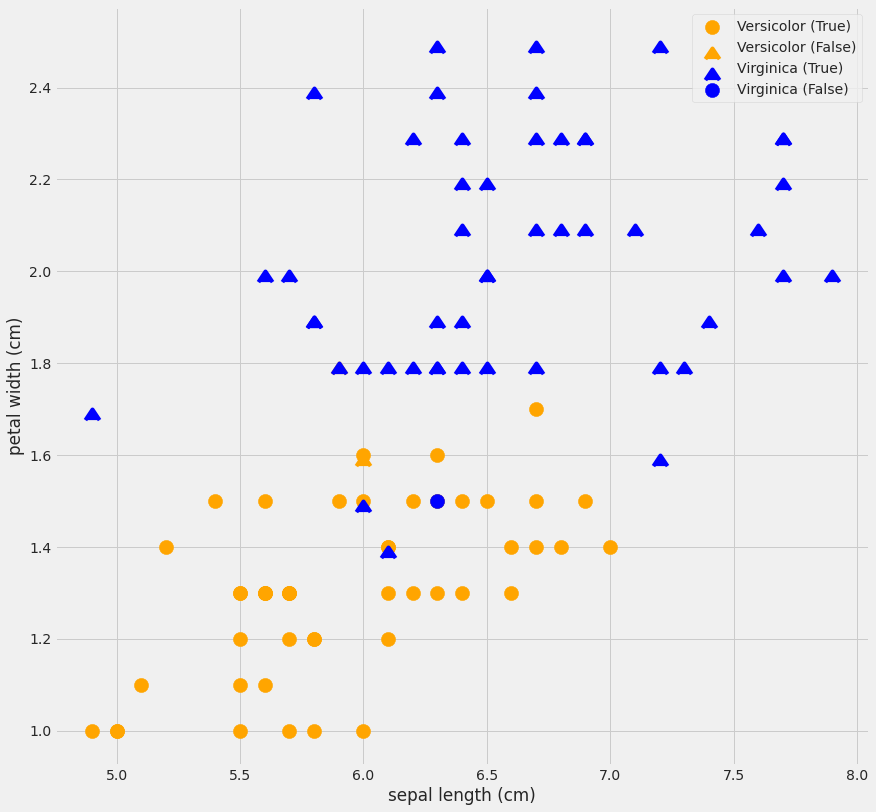

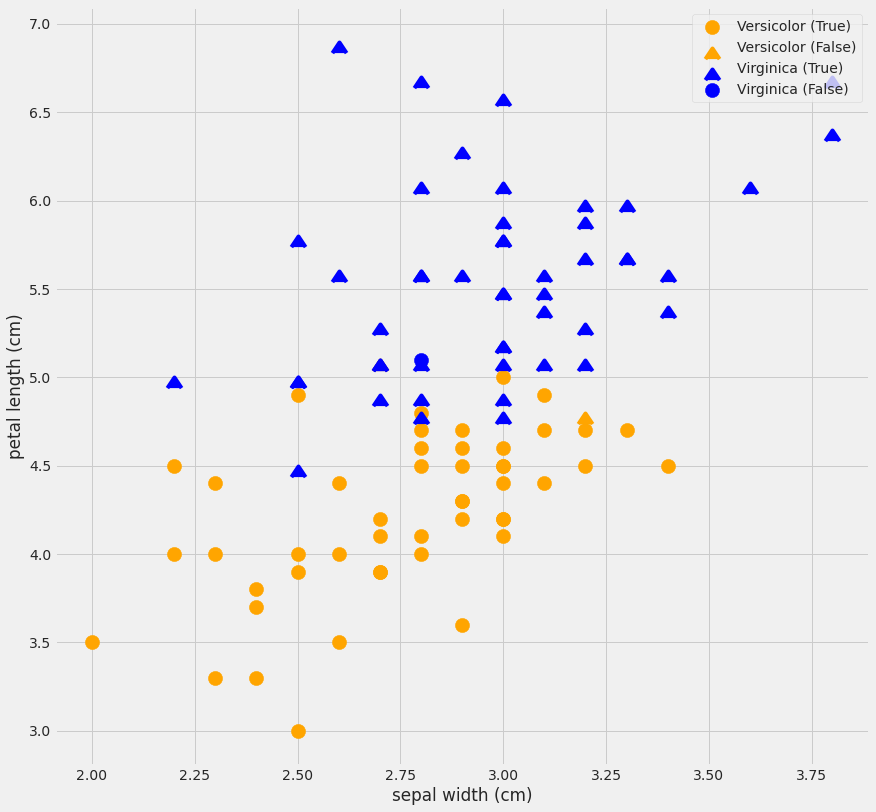

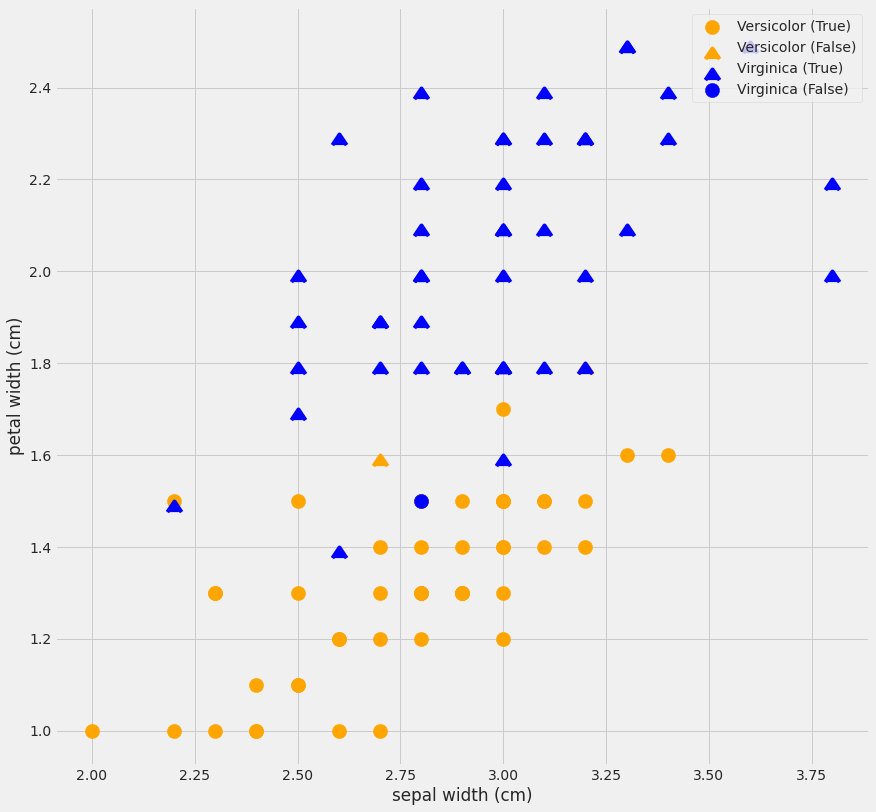

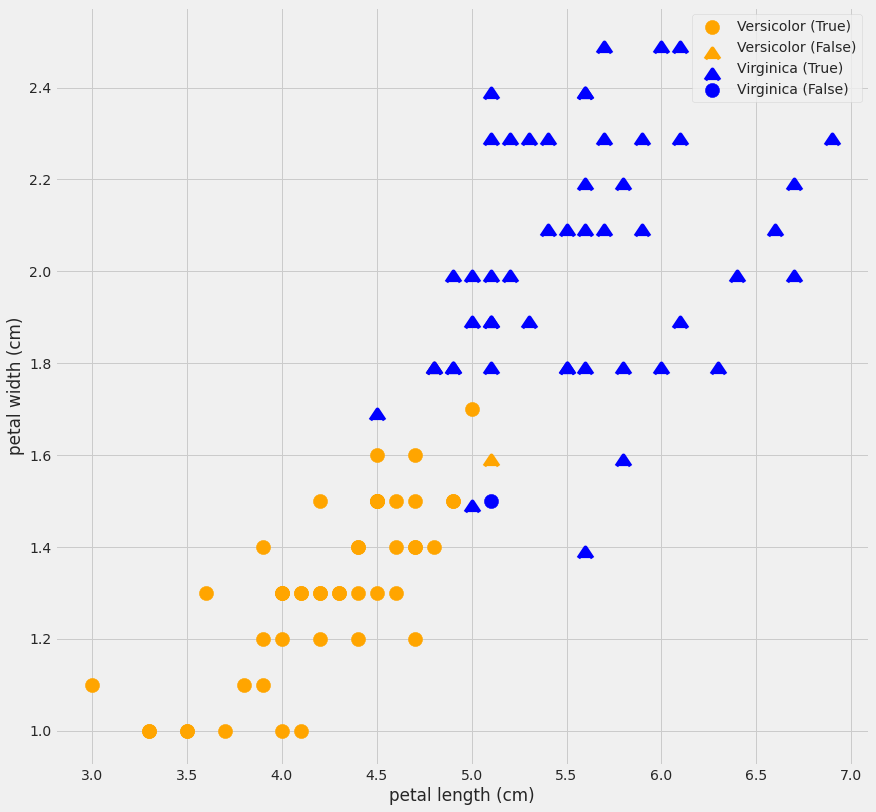

In [51]:
features = np.unique(y)
for i in range(4):
    for j in range(i, 4):
        if i == j:
            continue
        plt.figure(figsize=(13, 13))
        feature_1 = i
        feature_2 = j
        plt.scatter(X_0_T[:, feature_1], X_0_T[:, feature_2], color='orange', marker='o', s=200,
                    label='Versicolor (True)')
        plt.scatter(X_0_F[:, feature_1], X_0_F[:, feature_2], color='orange', marker=6, s=200,
                    label='Versicolor (False)')
        plt.scatter(X_1_T[:, feature_1], X_1_T[:, feature_2], color='blue', marker=6, s=200, label='Virginica (True)')
        plt.scatter(X_1_F[:, feature_1], X_1_F[:, feature_2], color='blue', marker='o', s=200,
                    label='Virginica (False)')
        plt.xlabel(feat_names[i])
        plt.ylabel(feat_names[j])
        plt.legend(loc='upper right')
        plt.show()

# TASK 4

In [52]:
iris_df = pd.read_csv('iris.data')


# Считаем необходимые параметры (среднее, ков. матрицы)

In [53]:
X = iris_df.loc[:, ['sepal width (cm)', 'petal length (cm)']][50:]
y = iris_df.loc[:, ['class']][50:]

feat_names = X.columns
spec_names = np.unique(y)

n_1 = len(X[y['class'] == 'Iris-versicolor'])
n_2 = len(X[y['class'] == 'Iris-virginica'])

N = len(X)
P_1 = n_1 / N
P_2 = n_2 / N

mu = np.array(X[y['class'] == 'Iris-versicolor'].mean())
nu = np.array(X[y['class'] == 'Iris-virginica'].mean())

S_1 = np.cov((X[y['class'] == 'Iris-versicolor'] - mu).values.T)
S_2 = np.cov((X[y['class'] == 'Iris-virginica'] - nu).values.T)

X = X.values
le = LE()
y = le.fit_transform(y)

In [54]:
def Q(vec, mean_vec, cov_matr):
    return np.dot((vec - mean_vec), np.dot(np.linalg.inv(cov_matr), (vec - mean_vec)))

In [55]:
def l(vec):
    ans = 0.5 * (Q(vec, nu, S_2) - Q(vec, mu, S_1)) + np.log(
        np.sqrt((np.linalg.det(S_2)) / (np.linalg.det(S_1)))) + np.log(P_1 / P_2)
    return ans

In [56]:
def solve_function(matrix):
    matrix = np.array(matrix).reshape(-1, 2)
    N = matrix.shape[0]
    a = np.zeros((N, 1))
    for i in range(N):
        val = l(matrix[i])
        if val < 0:
            a[i] = 1
        else:
            a[i] = 0
    return a

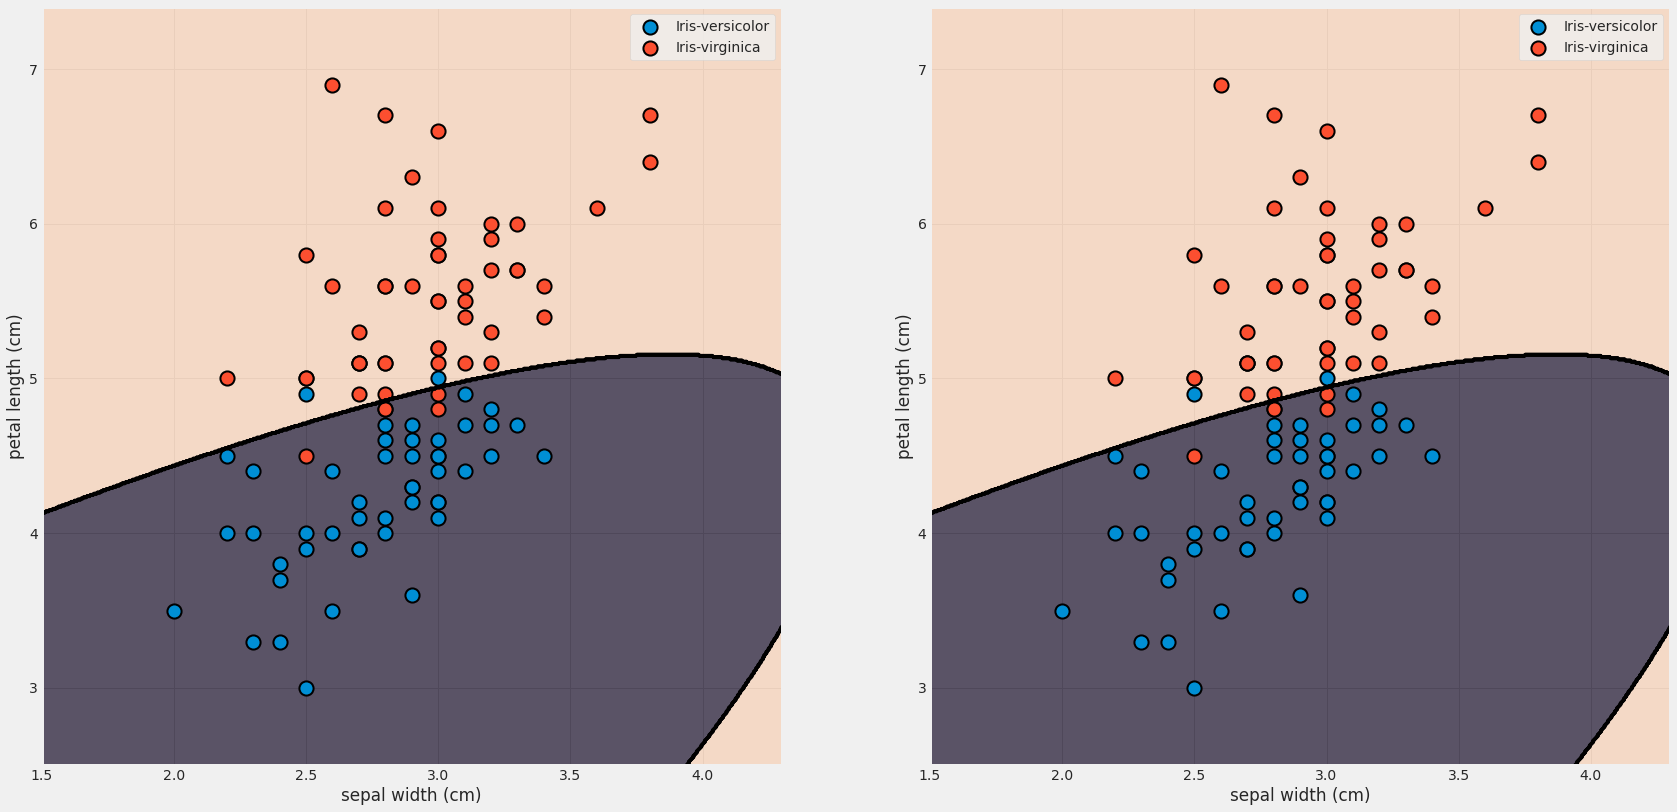

In [70]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 650),
    np.linspace(X[:, 1].min() - 1 / 2, X[:, 1].max() + 1 / 2, 650)
)

Z_own = solve_function(np.c_[xx.ravel(), yy.ravel()])
Z_own = Z_own.reshape(xx.shape)

qda_clf = QDA().fit(X, y)
Z_target = qda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_target = Z_target.reshape(xx.shape)

plt.figure(figsize=(26, 13))
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_own, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z_own, linewidths=3,colors='black')
plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, label=spec_names[0],edgecolors='black',linewidths=2.)
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200, label=spec_names[1],edgecolors='black',linewidths=2.)
plt.xlabel(feat_names[0])
plt.ylabel(feat_names[1])
plt.legend()
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_target, linewidths=1.0,alpha=0.7)
plt.contour(xx, yy, Z_target, linewidths=3,colors='black')
plt.scatter(X[0:50][:, 0], X[0:50][:, 1], s=200, label=spec_names[0],edgecolors='black',linewidths=2.)
plt.scatter(X[50:100][:, 0], X[50:100][:, 1], s=200, label=spec_names[1],edgecolors='black',linewidths=2.)
plt.xlabel(feat_names[0])
plt.ylabel(feat_names[1])
plt.legend()
